Importação das Bibiliotecas e Leitura do Dataset

In [15]:
import pandas as pd
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt
import seaborn as sns

uploaded = files.upload()

for filename in uploaded.keys():

    dataset = pd.read_csv(filename)
    print(f"Arquivo {filename} carregado com sucesso!")

print(dataset.head())


Saving AmesHousing.csv to AmesHousing (1).csv
Arquivo AmesHousing (1).csv carregado com sucesso!
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  

Reunindo Informações Estatísticas do Dataset

In [16]:
estatisticas = dataset.describe()
print(estatisticas)

            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    

In [17]:
estatisticasnaonumericas = dataset.describe(include=['object'])
print(estatisticasnaonumericas)

       MS Zoning Street Alley Lot Shape Land Contour Utilities Lot Config  \
count       2930   2930   198      2930         2930      2930       2930   
unique         7      2     2         4            4         3          5   
top           RL   Pave  Grvl       Reg          Lvl    AllPub     Inside   
freq        2273   2918   120      1859         2633      2927       2140   

       Land Slope Neighborhood Condition 1  ... Garage Type Garage Finish  \
count        2930         2930        2930  ...        2773          2771   
unique          3           28           9  ...           6             3   
top           Gtl        NAmes        Norm  ...      Attchd           Unf   
freq         2789          443        2522  ...        1731          1231   

       Garage Qual Garage Cond Paved Drive Pool QC  Fence Misc Feature  \
count         2771        2771        2930      13    572          106   
unique           5           5           3       4      4            5   
top   

Limpando o Dataset

In [18]:
valoresnulos = dataset.isnull().sum()
porcentagemvaloresnulos = (valoresnulos / len(dataset)) * 100

valoresnulos_df = pd.DataFrame({
    'Quantidade': valoresnulos,
    'Porcentagem': porcentagemvaloresnulos
})

resultado = pd.concat([valoresnulos, porcentagemvaloresnulos], axis=1,
                      keys=['Quantidade', 'Porcentagem'])
resultado = resultado[resultado['Quantidade'] > 0].sort_values(by="Quantidade", ascending=False)

print (resultado)

                Quantidade  Porcentagem
Pool QC               2917    99.556314
Misc Feature          2824    96.382253
Alley                 2732    93.242321
Fence                 2358    80.477816
Mas Vnr Type          1775    60.580205
Fireplace Qu          1422    48.532423
Lot Frontage           490    16.723549
Garage Cond            159     5.426621
Garage Qual            159     5.426621
Garage Finish          159     5.426621
Garage Yr Blt          159     5.426621
Garage Type            157     5.358362
Bsmt Exposure           83     2.832765
BsmtFin Type 2          81     2.764505
Bsmt Cond               80     2.730375
Bsmt Qual               80     2.730375
BsmtFin Type 1          80     2.730375
Mas Vnr Area            23     0.784983
Bsmt Half Bath           2     0.068259
Bsmt Full Bath           2     0.068259
BsmtFin SF 1             1     0.034130
Garage Cars              1     0.034130
Garage Area              1     0.034130
Total Bsmt SF            1     0.034130


In [19]:
# Piscina, Benefícios, Cerca, Beco, Lareira, Fachada e Garagem
dataset["Pool QC"].fillna("No Pool", inplace=True)
dataset['Misc Feature'].fillna('No feature', inplace=True)
dataset['Alley'].fillna('No alley', inplace=True)
dataset['Fence'].fillna('No fence', inplace=True)
dataset['Mas Vnr Type'].fillna('No type', inplace=True)
dataset['Fireplace Qu'].fillna('No Fireplace', inplace=True)
dataset['Lot Frontage'].fillna(0, inplace=True)

colunasdagaragem = [col for col in dataset.columns if col.startswith("Garage")]
dataset[dataset['Garage Cars'].isna()][colunasdagaragem]

dataset[~pd.isna(dataset['Garage Type']) &
        pd.isna(dataset['Garage Qual'])][colunasdagaragem]

dataset['Garage Cars'].fillna(0, inplace=True)
dataset['Garage Area'].fillna(0, inplace=True)
dataset['Garage Yr Blt'].fillna(0, inplace=True)

dataset.loc[~pd.isna(dataset['Garage Type']) &
            pd.isna(dataset['Garage Qual']), "Garage Type"] = "No Garage"

for col in ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']:
    dataset[col].fillna('No Garage', inplace=True)

In [20]:
# Porão (Basement)
colunasporao = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

dataset[colunasporao] = dataset[colunasporao].fillna("No Basement")
dataset[dataset['Bsmt Half Bath'].isnull()][colunasporao]

dataset['Electrical'].fillna(dataset['Electrical'].mode()[0], inplace=True)

Gráfico de Dispersão

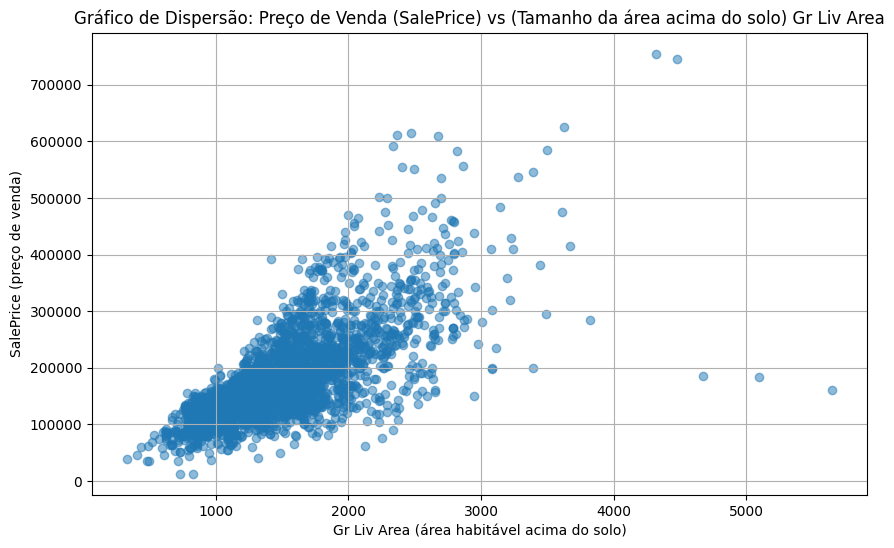

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Gr Liv Area'], dataset['SalePrice'], alpha=0.5)
plt.title('Gráfico de Dispersão: Preço de Venda (SalePrice) vs (Tamanho da área acima do solo) Gr Liv Area')
plt.xlabel('Gr Liv Area (área habitável acima do solo)')
plt.ylabel('SalePrice (preço de venda)')
plt.grid(True)
plt.show()

Removendo Pontos Fora da Curva no Gráfico de Dispersão

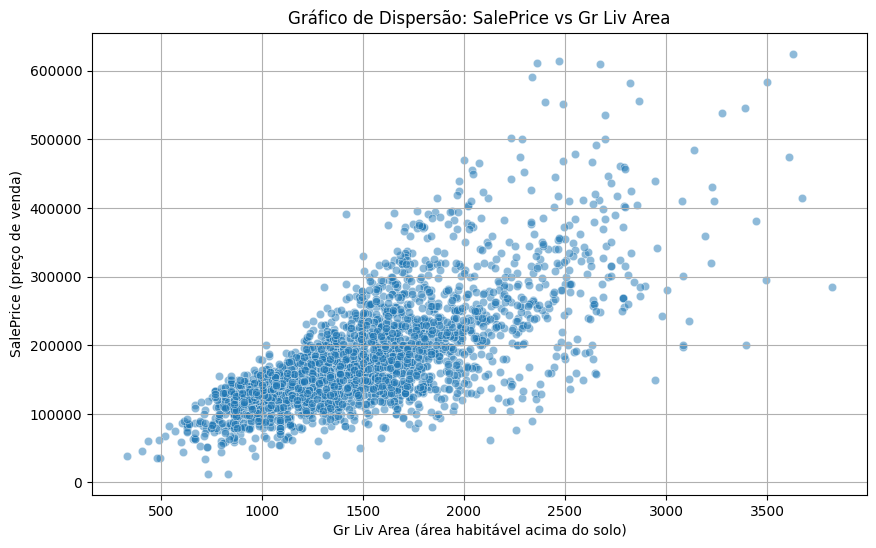

In [24]:
datasetfiltrado = dataset[dataset['Gr Liv Area'] <= 4000]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=datasetfiltrado, alpha=0.5)
plt.title('Gráfico de Dispersão: SalePrice vs Gr Liv Area')
plt.xlabel('Gr Liv Area (área habitável acima do solo)')
plt.ylabel('SalePrice (preço de venda)')
plt.grid(True)
plt.show()

In [25]:
dataset.reset_index(drop=True, inplace=True)

Violin Plot, Boxplot e Histograma

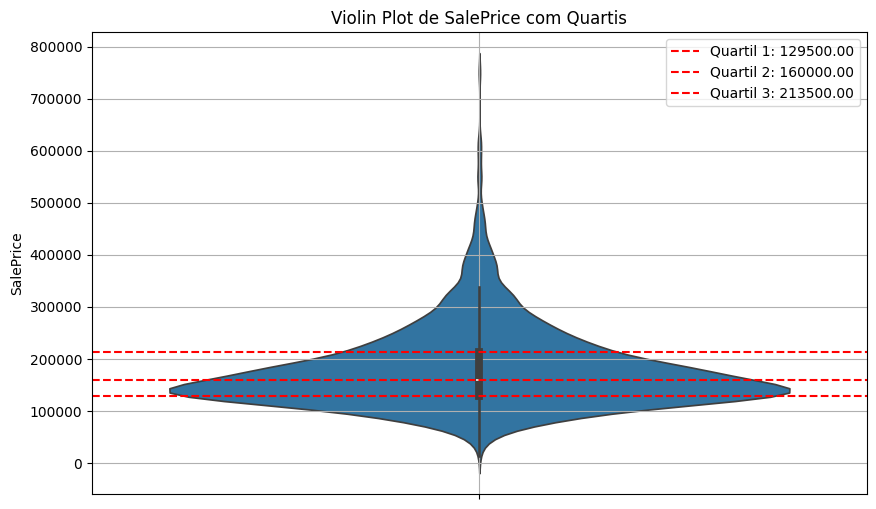

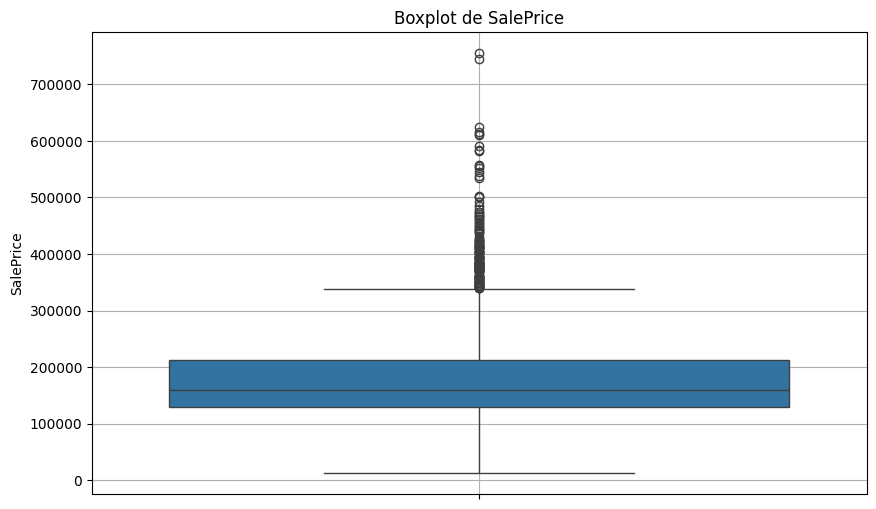

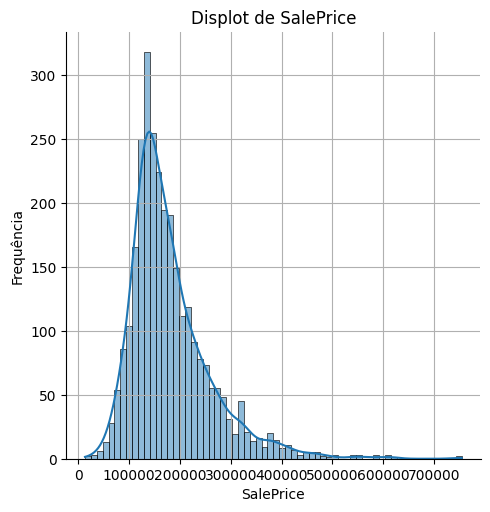

In [35]:
quartis = dataset['SalePrice'].quantile([0.25, 0.5, 0.75])

plt.figure(figsize=(10, 6))
sns.violinplot(y='SalePrice', data=dataset)
plt.title('Violin Plot de SalePrice com Quartis')
plt.ylabel('SalePrice')

for i, quartil in enumerate(quartis):
    plt.axhline(y=quartil, color='r', linestyle='--', label=f'Quartil {i+1}: {quartil:.2f}')

plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y='SalePrice', data=dataset)
plt.title('Boxplot de SalePrice')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()

sns.displot(dataset['SalePrice'], kde=True)
plt.title('Displot de SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

Correlação

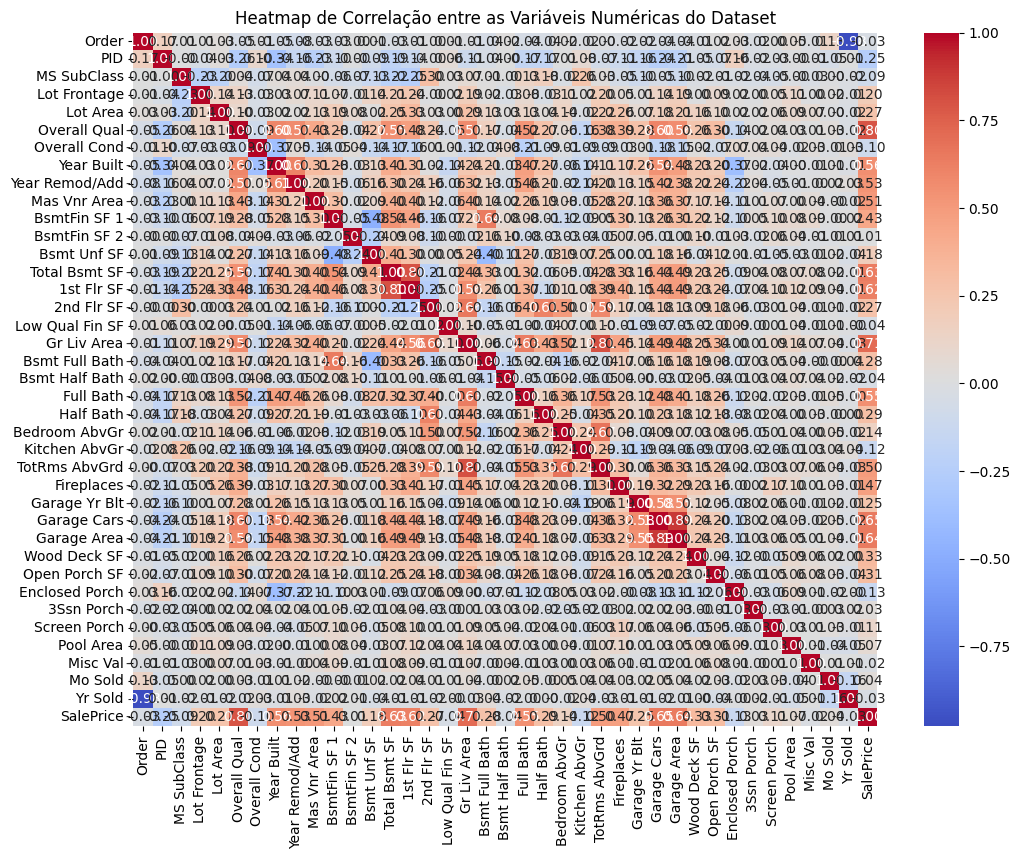

In [41]:
# Mapa de Calor das Variáveis
colnumericas = dataset.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 9))
sns.heatmap(colnumericas.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação entre as Variáveis Numéricas do Dataset')
plt.show()

Histograma OverallQuality (Qualidade) e Dispersão entre OverallQuality e Preço de Venda (SalePrice)

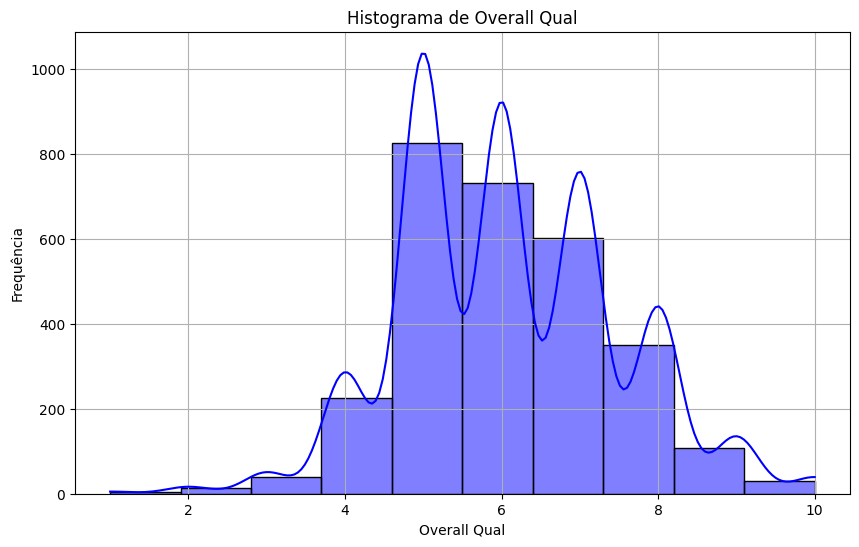

<Figure size 1000x600 with 0 Axes>

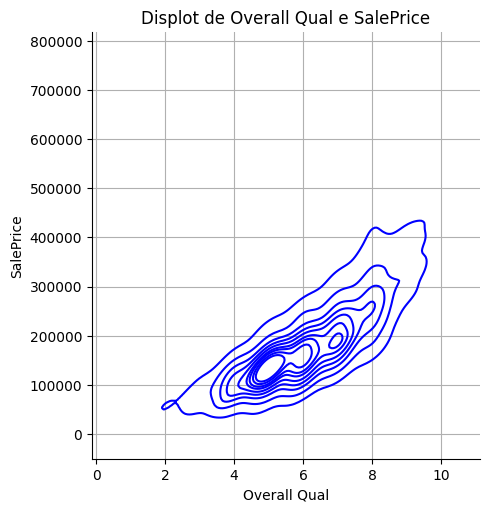

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Overall Qual', bins=10, kde=True, color='blue')
plt.title('Histograma de Overall Qual')
plt.xlabel('Overall Qual')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.displot(data=dataset, x='Overall Qual', y='SalePrice', kind='kde', color='blue')
plt.title('Displot de Overall Qual e SalePrice')
plt.xlabel('Overall Qual')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()

Histograma Gr Liv Area (Área Habitável Acima do Solo), Dispersão e Histograma entre Gr Liv Area e SalePrice (Preço de Venda)

<Figure size 1000x600 with 0 Axes>

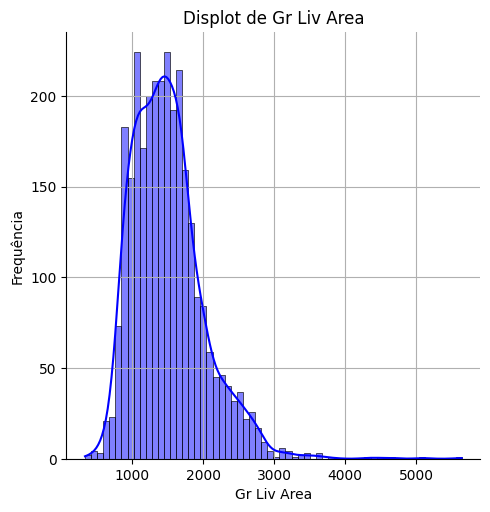

<Figure size 1000x600 with 0 Axes>

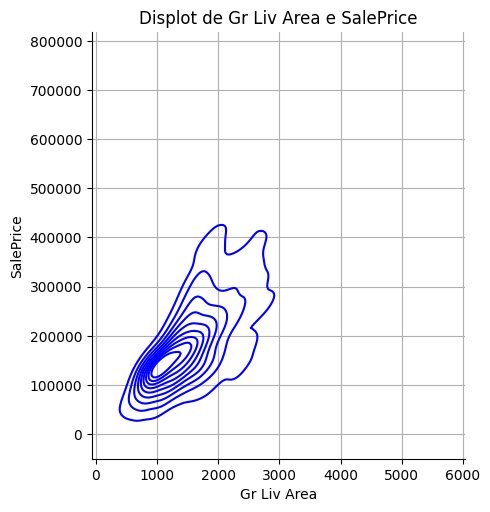

In [47]:
plt.figure(figsize=(10, 6))
sns.displot(data=dataset, x='Gr Liv Area', kde=True, color='blue')
plt.title('Displot de Gr Liv Area')
plt.xlabel('Gr Liv Area')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.displot(data=dataset, x='Gr Liv Area', y='SalePrice', kind='kde', color='blue')
plt.title('Displot de Gr Liv Area e SalePrice')
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()

Dispersão entre Year Built (Ano de Construção), GarageCars, GarageArea e Total de Porões (Total Bsmt Sf) e SalePrice (Preço)

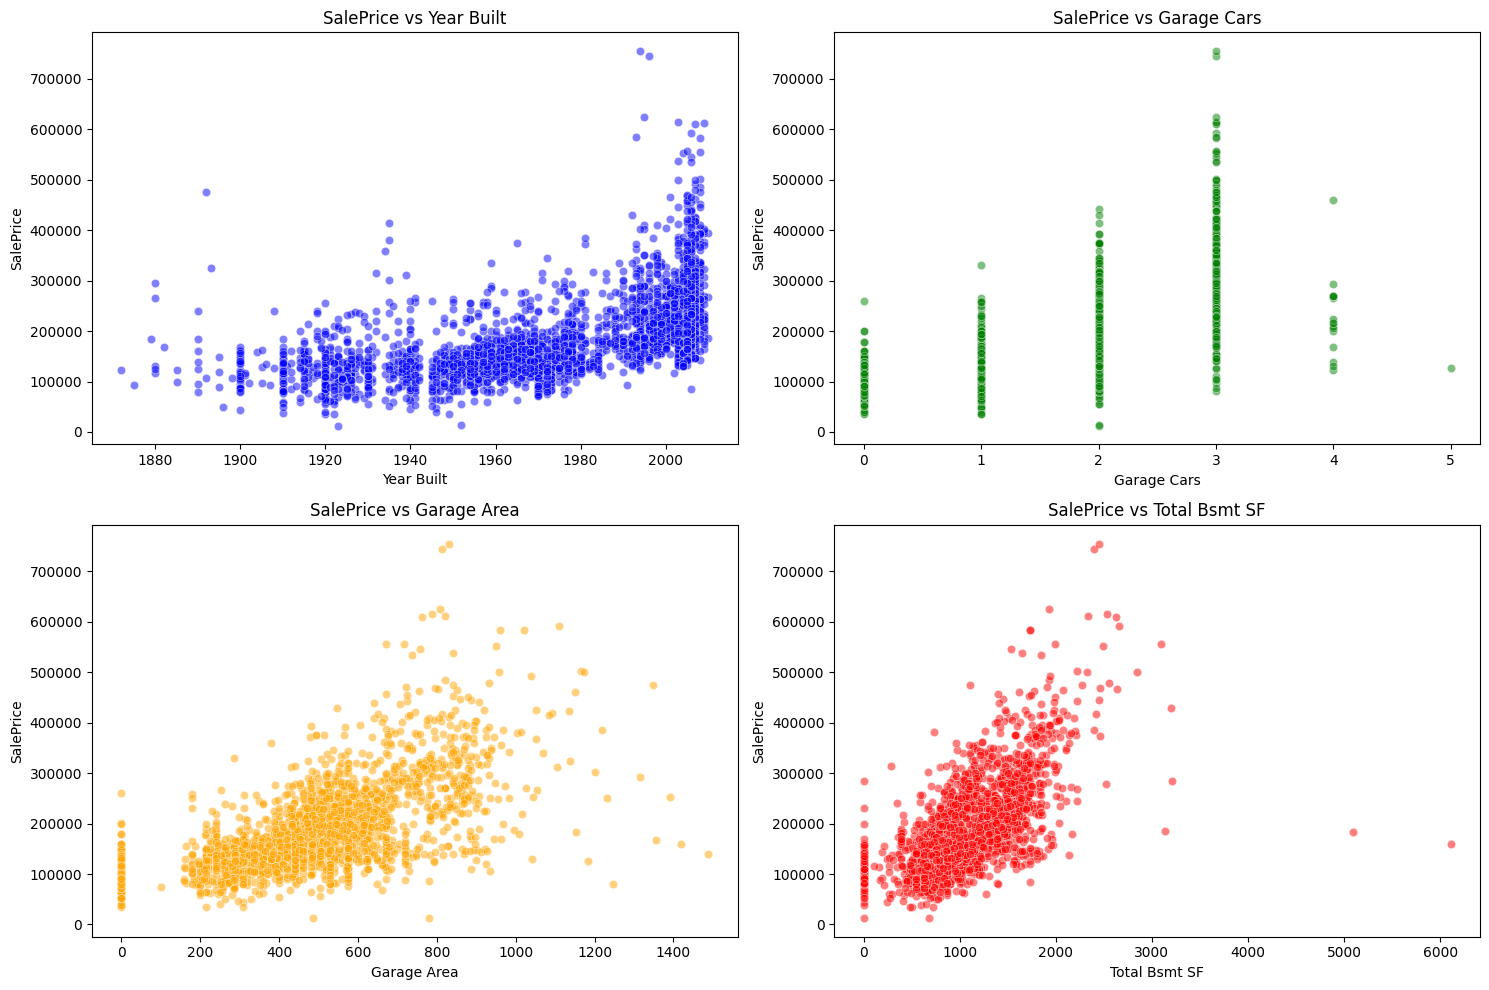

In [49]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=dataset, x='Year Built', y='SalePrice', color='blue', alpha=0.5)
plt.title('SalePrice vs Year Built')

plt.subplot(2, 2, 2)
sns.scatterplot(data=dataset, x='Garage Cars', y='SalePrice', color='green', alpha=0.5)
plt.title('SalePrice vs Garage Cars')

plt.subplot(2, 2, 3)
sns.scatterplot(data=dataset, x='Garage Area', y='SalePrice', color='orange', alpha=0.5)
plt.title('SalePrice vs Garage Area')

plt.subplot(2, 2, 4)
sns.scatterplot(data=dataset, x='Total Bsmt SF', y='SalePrice', color='red', alpha=0.5)
plt.title('SalePrice vs Total Bsmt SF')

plt.tight_layout()
plt.show()

Previsões

MSE: 1606163977.1891465
[187557.68463957 128678.24615052 219493.62346215  92291.61688999
 116634.4043615  188846.19382667 202602.98661745 172600.4935012
  62684.46591637 307698.74439534 235249.28285734 230805.98260678
  91388.17060776 189980.26596315  99705.6742087  160777.83372191
 161388.20134356 213346.55359836 137690.01596834 151640.10179258
 218361.1437888  133857.54703746 199351.14030354 221314.46006076
 212776.04869349 291960.68591773 331746.82672921 230072.34588818
 218841.11749797 221713.87265513 209121.62898866  64196.09524413
 253088.48367991 102519.33727113 160040.78229729  93734.95341069
 208338.1209029  278681.53590376 208557.90560706 225153.2618892
 330795.95911418 193691.78839747 221101.42116845 195352.40045537
  86130.16925312 299739.39933216 189752.62604534 154204.03331631
 157364.11693247 120998.96286197 205743.81764299 113931.28528927
 141223.77376967 210950.07180132 218655.59117438 215478.61271093
 227870.39559561 111128.07340219 236258.68235104 157635.5897696
   1

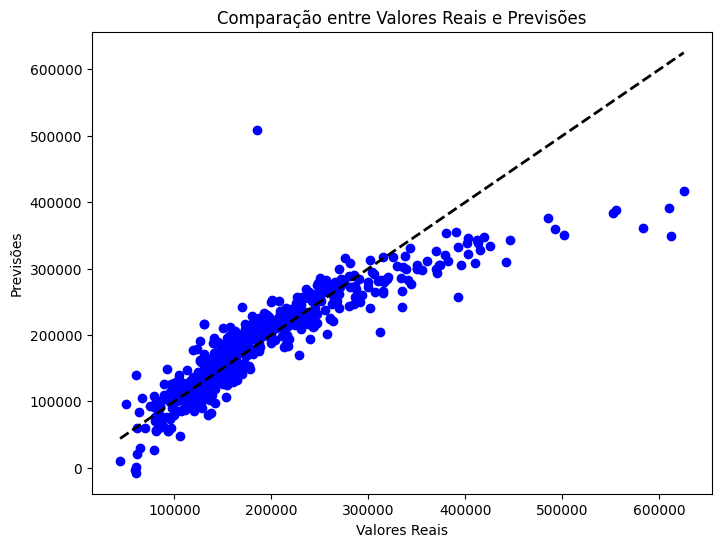

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = dataset[['Overall Qual', 'Gr Liv Area', 'Year Built', 'Garage Cars', 'Garage Area', 'Total Bsmt SF']]
y = dataset['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.fillna(X_train.median(), inplace=True)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
print(y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Comparação entre Valores Reais e Previsões')
plt.show()


Modelo RandomForest

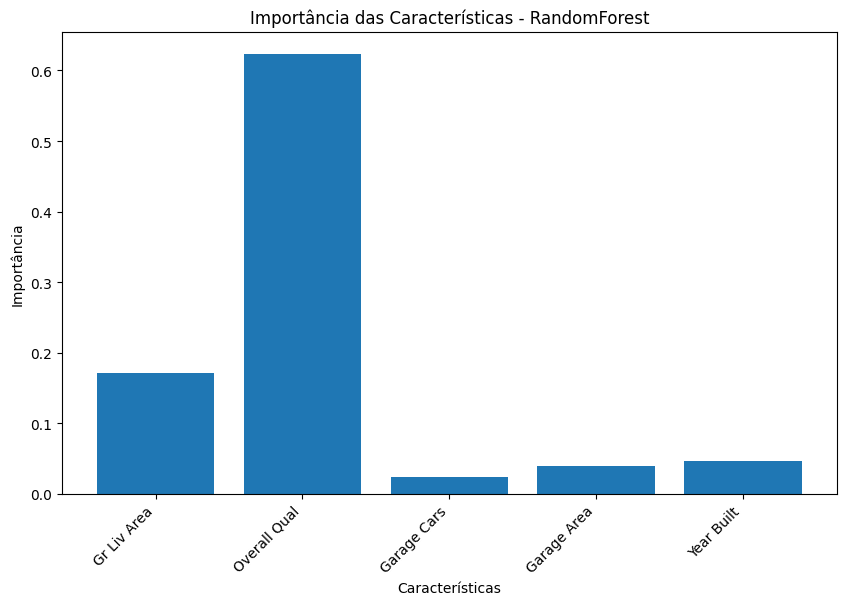

In [56]:
from sklearn.ensemble import RandomForestRegressor

caracteristicas = ['Gr Liv Area', 'Overall Qual', 'Garage Cars', 'Garage Area', 'Year Built']

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

rf_feature_importances = rf_model.feature_importances_

selected_rf_feature_importances = [rf_feature_importances[X.columns.get_loc(feature)] for feature in features]

plt.figure(figsize=(10, 6))
plt.bar(caracteristicas, selected_rf_feature_importances)
plt.xlabel('Características')
plt.ylabel('Importância')
plt.title('Importância das Características - RandomForest')
plt.xticks(rotation=45, ha='right')
plt.show()



Modelo XGBoost

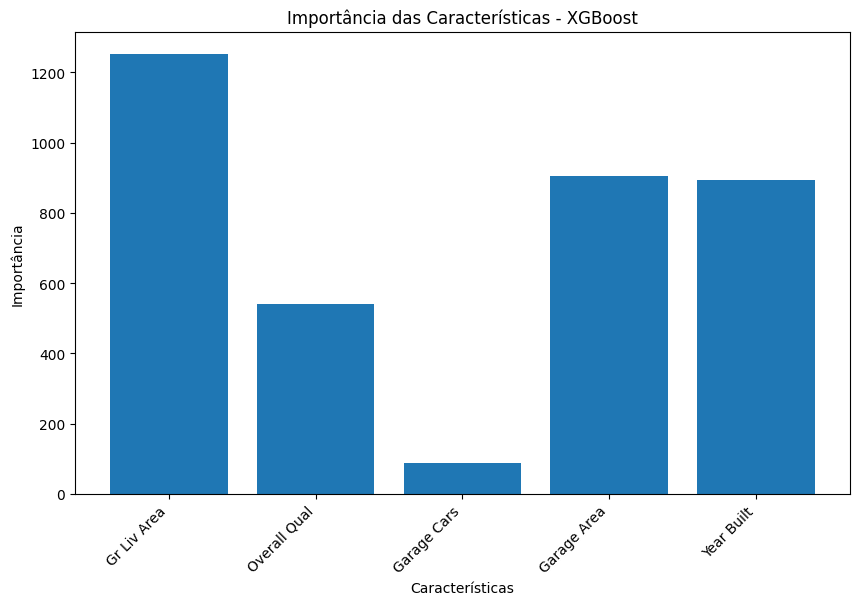

In [62]:
import xgboost as xgb
from xgboost import XGBRegressor

caracteristicas = ['Gr Liv Area', 'Overall Qual', 'Garage Cars', 'Garage Area', 'Year Built']

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

xgb_feature_importances = xgb_model.get_booster().get_score(importance_type='weight')

selected_xgb_feature_importances = {caracteristica: xgb_feature_importances.get(caracteristica, 0) for caracteristica in caracteristicas}

plt.figure(figsize=(10, 6))
plt.bar(selected_xgb_feature_importances.keys(), selected_xgb_feature_importances.values())
plt.xlabel('Características')
plt.ylabel('Importância')
plt.title('Importância das Características - XGBoost')
plt.xticks(rotation=45, ha='right')
plt.show()
